In [58]:
import warnings
warnings.simplefilter('ignore')

In [59]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae

In [60]:
# load libraries and set plot parameters

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = "serif"
# plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

# Table of Contents

1. [Introduction](#intro)
1. [Models](#models)
1. [Metrics](#metrics)
1. [Data collection](#data_collection)
1. [Data analysis](#data_analysis)

<a id="intro"></a>
# Introduction

Have you ever complained about the weatherman failing to predict the weather correctly?

That's the question we aim to answer here: how reliable are the weather forecasts?

To do so we compare the accuracy of different weather models ranging from a naive approach to sophisticated meteorological models.

The scope of this analysis is restricted to the **temperature** in five locations around the world, namely:

- London
- Madrid
- Sydney
- New York
- Sao Paulo

<a id="models"></a>
# Models


### Naive forecast

Consists in assuming that the next value is the same as the one of the last period.

The tricky part is to identify what the last value is. For instance, if we measure the temperature
every 3 hours and we want to predict the temperature today at 3pm, what is the last value: today's temperature at 12pm, yesterday's temperature at 3pm or maybe last year's temperature on the same day at 3pm?


### Average values

Following with the previous example, we could use the average of the temperature over the last 20
years on the same day at 3pm


### Meteorological models

Provided by [OpenWeather](https://openweathermap.org/technology)

<a id="metrics"></a>
# Metrics

Metrics are used to evaluate the accuracy of the models' predictions when compared to the actual values.


### Mean absolute scaled error (MASE)

Mean absolute scaled error is a measure of the precision of a model compared to the naive forecast.

It is the mean absolute error of the forecast values, divided by the mean absolute error of the naive forecast.

Values greater than one indicate that the naive method performs better than the forecast values under consideration.

Currently, the following metrics are supported:

- **"mase"**: based on the value of the last measurement (3 hours before)
- **"mase1d"**: based on the value of the previous day's measurement


### Mean absolute error (MAE)

Average of the absolute value of the errors (the errors being the differences between predicted and real values)

### Root mean squared error (RMSE)

Square root of the average of the square of the errors

It weighs outliers more heavily than MAE as a result of the squaring of each term, which effectively weighs large errors more heavily than small ones

### Median absolute error (MEDAE)

Median of the absolute value of the errors.

It is robust to outliers

<a id="data_collection"></a>
# Data collection


This page collects data about the actual weather and the meteorological forecast for the following 5 days.

This data is obtained from [OpenWeather](https://openweathermap.org) through the endpoints:

- current weather data
- 5 day forecast

Given that the 5 day forecast only includes data every 3 hours (00:00, 03:00, 06:00, 09:00, 12:00, 15:00, 18:00, 21:00), those are also the data points for which the current weather data is read.

As a result, for every tempeature there are 5 forecasts: t5, t4, t3, t2 and t1, where **'tn'** is the forecast of the temperature **'n'** days in advance.

<a id="data_analysis"></a>
# Data analysis

In [61]:
cities = ["london", "madrid", "saopaulo", "sydney", "newyork"]
city_name = {"london":"London", "madrid":"Madrid", "saopaulo":"Sao Paulo", "sydney":"Sydney", "newyork":"New York"}

In [62]:
def dfs(city):
    true_temp_df = pd.read_csv(f"csv_files/weather_{city}.csv", usecols=['temp', 'dt', 'today'], dtype={'dt': 'int64'})
    forecast_temp_df = pd.read_csv(f"csv_files/forecast_{city}.csv", usecols=['temp', 'dt', 'today'], dtype={'dt': 'int64'})
    join_data_df = pd.read_csv(f"csv_files/join_{city}.csv", usecols=['temp', 'dt', 'today', 't5', 't4', 't3', 't2', 't1'])
    metrics_df = pd.read_csv(f"csv_files/metrics_{city}.csv")
    return {"true_temp_df":true_temp_df,"forecast_temp_df":forecast_temp_df,"join_data_df":join_data_df,"metrics_df":metrics_df}

In [86]:
madrid = dfs("madrid")
madrid['metrics_df'].tail(1)

,mae,rmse,medae,mase,mase1d
4,1.0419,1.375202,0.845,0.398938,0.549112


## Actual vs Forecast temperature

In [80]:
def plot_true_vs_forecast(city):
    df = dfs(city)
    N = df["join_data_df"].shape[0]
#     min_x = 0
#     max_x = N
    min_x = N-56 #(7 days)
    max_x = N
    x = np.linspace(0,max_x-min_x,max_x-min_x)
    plt.plot(x, df["join_data_df"]['temp'][min_x:max_x], label='true temp', color='green', marker="o")
#     plt.plot(x, df["join_data_df"]['t5'][min_x:max_x], label='t5', color='blue')
    # plt.plot(x, df["join_data_df"]['t4'][min_x:max_x], label='t4', color='grey', marker='^')
    # plt.plot(x, df["join_data_df"]['t3'][min_x:max_x], label='t3', color='purple', marker='|')
#     plt.plot(x, df["join_data_df"]['t2'][min_x:max_x], label='t2', color='orange', marker='|')
    plt.plot(x, df["join_data_df"]['t1'][min_x:max_x], label='t1', color='red', marker='*')
    plt.title(f"{city_name[city]}: True temp vs 1day-Forecast (last 7 days)")
    plt.legend()
    plt.show()
#     print("mae=" + str(mae(df["join_data_df"]['temp'][min_x:max_x], df["join_data_df"]['t1'][min_x:max_x])))

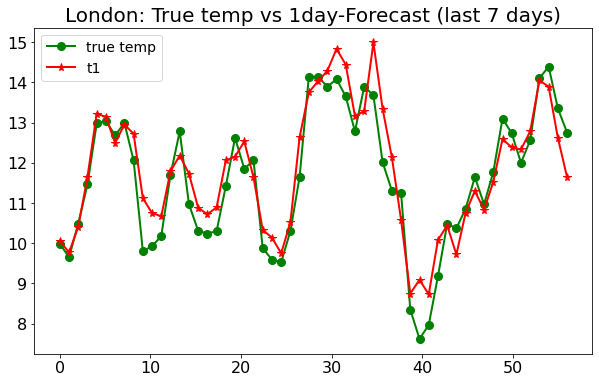

mae=0.5080357142857144


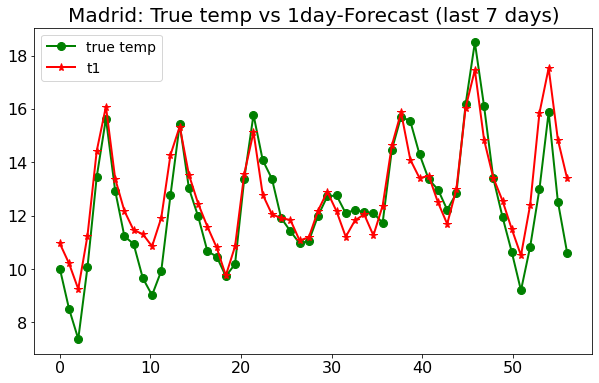

mae=0.8448214285714286


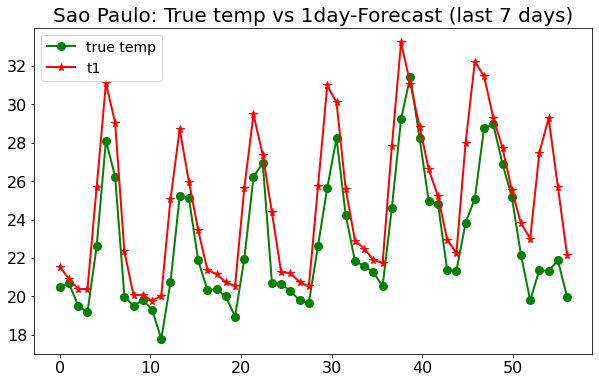

mae=2.063035714285714


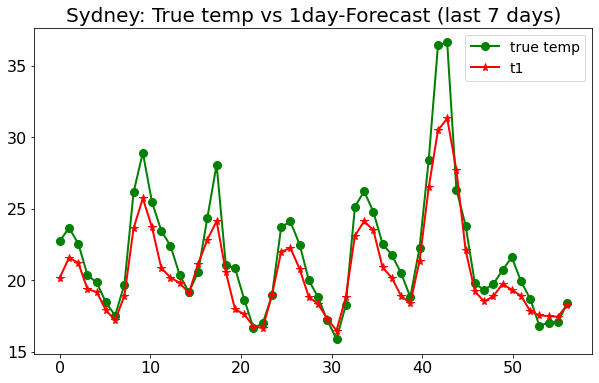

mae=1.3948214285714282


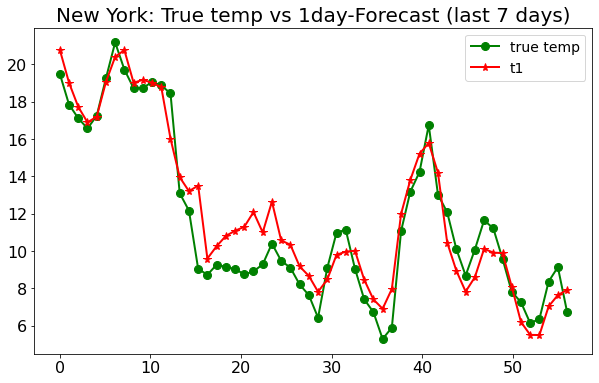

mae=1.16375


In [81]:
for city in cities:
    plot_true_vs_forecast(city)

## Metrics

In all cases, `medae < rmse < mae`

In [66]:
def plot_metrics(city):
    df = dfs(city)
    # plt.rcParams['figure.figsize'] = (7,3)
    x = np.linspace(0,1,5)
    axes= plt.axes()
#     plt.style.use('classic')
    axes.set_xticks(x)
    axes.set_xticklabels(['t5', 't4', 't3', 't2', 't1'])
    plt.plot(x, df["metrics_df"]['mae'], label='mae', color='blue', marker='o')
    plt.plot(x, df["metrics_df"]['rmse'], label='rmse', color='grey', marker='^')
    plt.plot(x, df["metrics_df"]['medae'], label='medae', color='red', marker='*')
    plt.title(f"metrics - {city_name[city]}")
    plt.legend()
    plt.show()

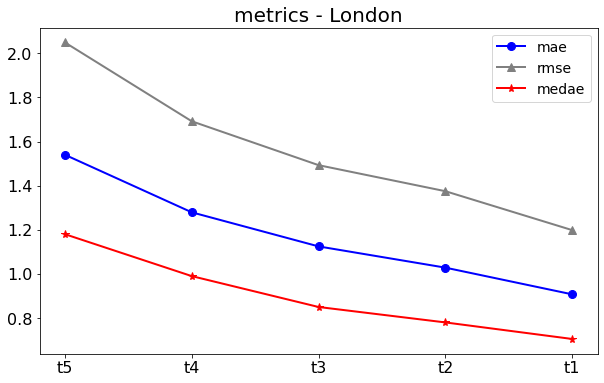

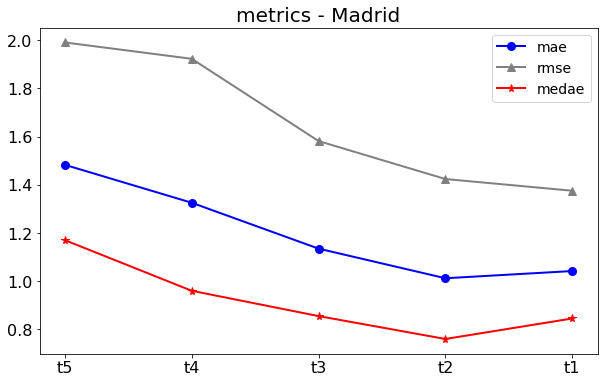

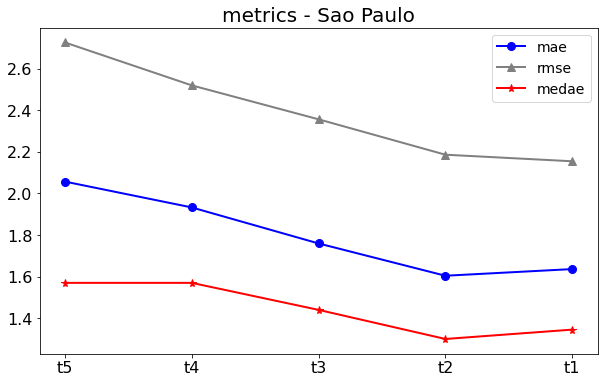

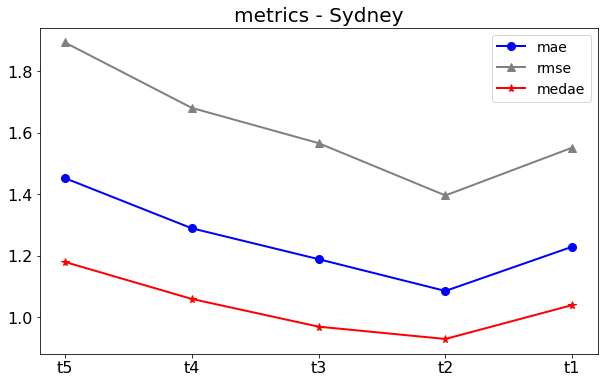

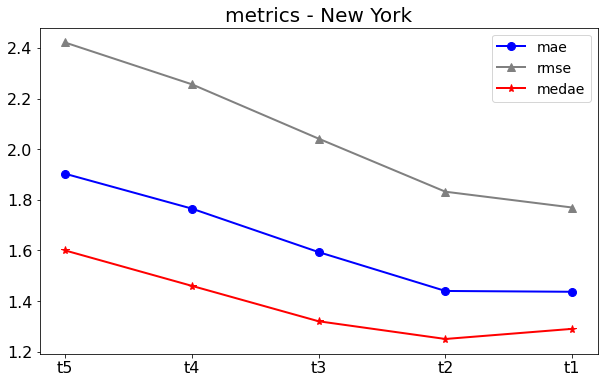

In [67]:
for city in cities:
    plot_metrics(city)

In [68]:
def plot_scaled_error(city):
    df = dfs(city)
    x = np.linspace(0,1,5)
    axes= plt.axes()
    axes.set_xticks(x)
    axes.set_xticklabels(['t5', 't4', 't3', 't2', 't1'])
    plt.plot(x, df["metrics_df"]['mase'], label='mase3h', color='blue', marker='o')
    plt.plot(x, df["metrics_df"]['mase1d'], label='mase1d', color='green', marker='^')
#     plt.plot(x, df["metrics_df"]['mase1y'], label='mase1y', color='red', marker='*')
#     plt.plot(x, df["metrics_df"]['mase1y_avg'], label='mase1y_avg', color='black', marker='o')
    plt.plot(x, np.ones(5), label='1', color='red')
    plt.title(f"Mean Absolute Scaled Error - {city_name[city]}")
    plt.legend()
    plt.show()

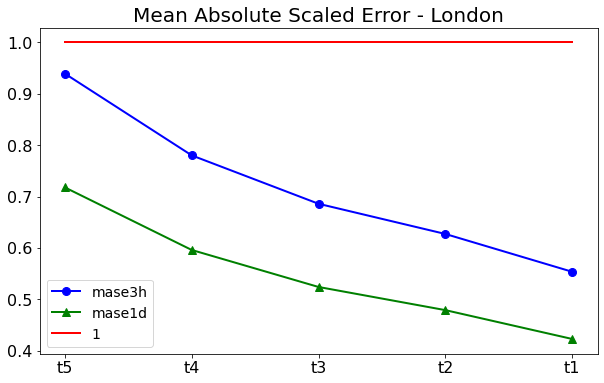

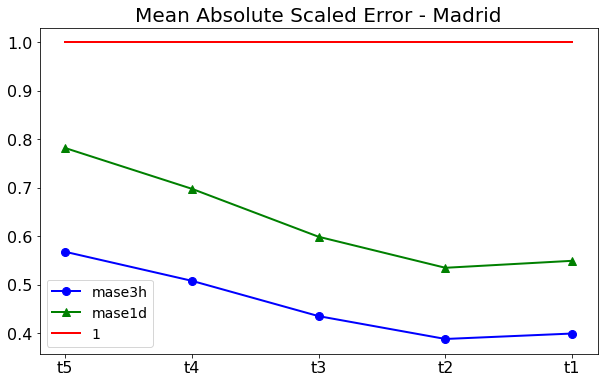

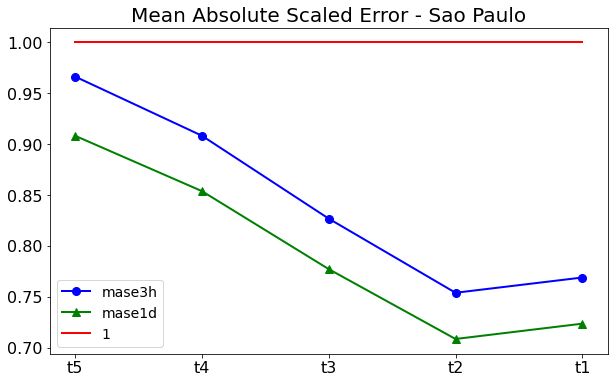

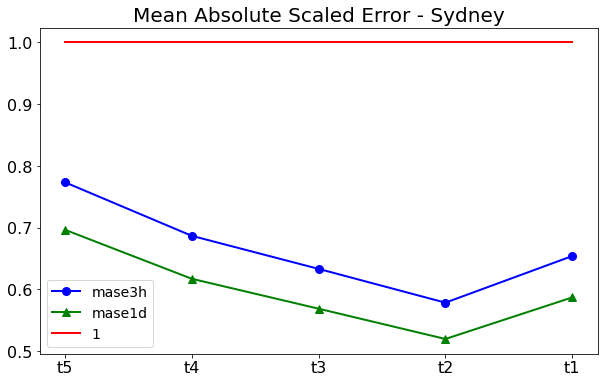

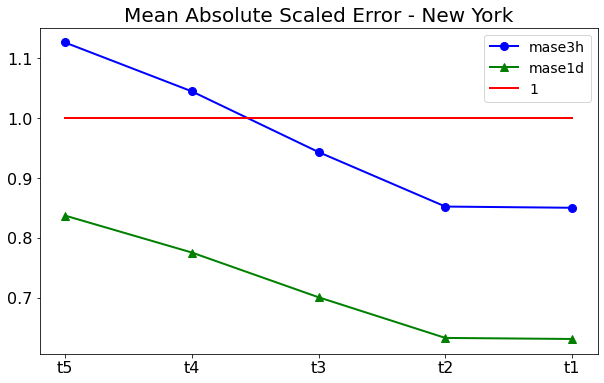

In [69]:
for city in cities:
    plot_scaled_error(city)

In [70]:
def plot_medae():
    # plt.rcParams['figure.figsize'] = (7,3)
    colors = ['blue', 'red', 'green', 'black', 'purple']
    x = np.linspace(0,1,5)
    axes= plt.axes()
    axes.set_xticks(x)
    axes.set_xticklabels(['t5', 't4', 't3', 't2', 't1'])
    for idx, city in enumerate(cities):
        df = dfs(city)    
        plt.plot(x, df["metrics_df"]['medae'], label=city_name[city], color=colors[idx], marker='o')
    plt.title("medae")
    plt.legend()
    plt.show()

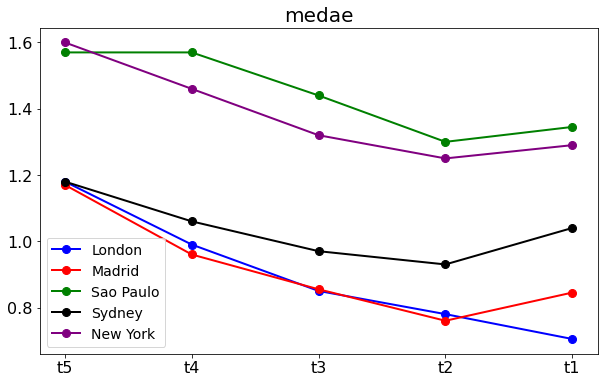

In [71]:
plot_medae()

In [72]:
def plot_mase1d():
    # plt.rcParams['figure.figsize'] = (7,3)
    colors = ['blue', 'red', 'green', 'black', 'purple']
    x = np.linspace(0,1,5)
    axes= plt.axes()
    axes.set_xticks(x)
    axes.set_xticklabels(['t5', 't4', 't3', 't2', 't1'])
    for idx, city in enumerate(cities):
        df = dfs(city)    
        plt.plot(x, df["metrics_df"]['mase1d'], label=city_name[city], color=colors[idx], marker='o')
    plt.plot(x, np.ones(5), label='1', color='grey')
    plt.title("mase1d")
    plt.legend()
    plt.show()

In [112]:
def plot_mase1d_new():
    # plt.rcParams['figure.figsize'] = (7,3)
    colors = ['blue', 'red', 'green', 'black', 'purple']
    x = np.linspace(0,1,5)
    axes= plt.axes()
    axes.set_xticks(x)
    axes.set_xticklabels(cities)
    mase1d = [float(dfs(city)["metrics_df"]['mase1d'].tail(1)) for idx, city in enumerate(cities)]  
    plt.bar(x, mase1d, width=0.1, color='green')
    plt.plot(x, np.ones(5), color='red')
    plt.title("mase1d")
#     plt.legend()
    plt.show()

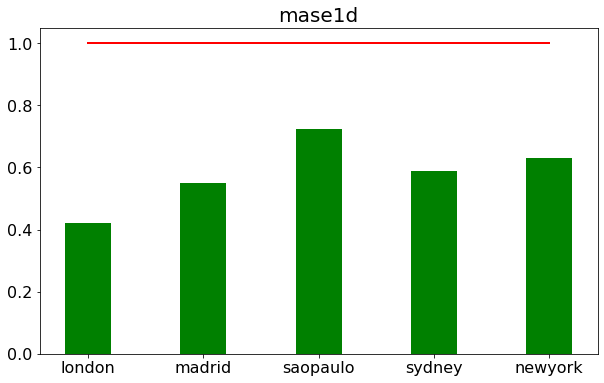

In [113]:
plot_mase1d_new()

<a id="results"></a>
# Results